### Import packages

In [1]:
library(cisTopic)

In [2]:
packageVersion("cisTopic")

[1] ‘0.2.1’

### Obtain Feature Matrix

In [3]:
start_time = Sys.time()

In [4]:
set.seed(2019)

In [5]:
metadata <- read.table('../../input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

In [6]:
head(metadata)

,label
AAACGAAAGCGCAATG-1,2
AAACGAAAGGGTATCG-1,6
AAACGAAAGTAACATG-1,1
AAACGAAAGTTACACC-1,4
AAACGAACAGAGATGC-1,5
AAACGAACATGCTATG-1,6


In [7]:
pathToBams <- '../../input/sc-bams_nodup/'

In [8]:
bamFiles <- paste(pathToBams, list.files(pathToBams), sep='')

In [9]:
head(bamFiles)

[1] "../../input/sc-bams_nodup/atac_v1_pbmc_5k_possorted_bam.AAACGAAAGCGCAATG-1.dedup.st.bam"
[2] "../../input/sc-bams_nodup/atac_v1_pbmc_5k_possorted_bam.AAACGAAAGGGTATCG-1.dedup.st.bam"
[3] "../../input/sc-bams_nodup/atac_v1_pbmc_5k_possorted_bam.AAACGAAAGTAACATG-1.dedup.st.bam"
[4] "../../input/sc-bams_nodup/atac_v1_pbmc_5k_possorted_bam.AAACGAAAGTTACACC-1.dedup.st.bam"
[5] "../../input/sc-bams_nodup/atac_v1_pbmc_5k_possorted_bam.AAACGAACAGAGATGC-1.dedup.st.bam"
[6] "../../input/sc-bams_nodup/atac_v1_pbmc_5k_possorted_bam.AAACGAACATGCTATG-1.dedup.st.bam"

In [10]:
cellnames <- sapply(strsplit(basename(bamFiles),'.',fixed = TRUE), "[[", 2)
head(cellnames)

[1] "AAACGAAAGCGCAATG-1" "AAACGAAAGGGTATCG-1" "AAACGAAAGTAACATG-1"
[4] "AAACGAAAGTTACACC-1" "AAACGAACAGAGATGC-1" "AAACGAACATGCTATG-1"

In [11]:
sum(cellnames == rownames(metadata))

[1] 5335

In [12]:
ix = match(rownames(metadata),cellnames)
bamFiles = bamFiles[ix]
cellnames = cellnames[ix]

In [13]:
sum(cellnames == rownames(metadata))

[1] 5335

In [14]:
regions <- '../../input/atac_v1_pbmc_5k_peaks.bed'

In [15]:
cisTopicObject <- createcisTopicObjectFromBAM(bamFiles, regions, project.name='10xpbmc5k')
cisTopicObject <- renameCells(cisTopicObject, cellnames)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
cisTopicObject <- runModels(cisTopicObject, topic=c(10, 20, 30, 40, 45, 50), seed=987, nCores=10, burnin = 120, iterations = 150, addModels=FALSE)

[1] "Formatting data..."
[1] "The number of cores (10) is higher than the number of models (6)."
[1] "Exporting data..."
[1] "Running models..."


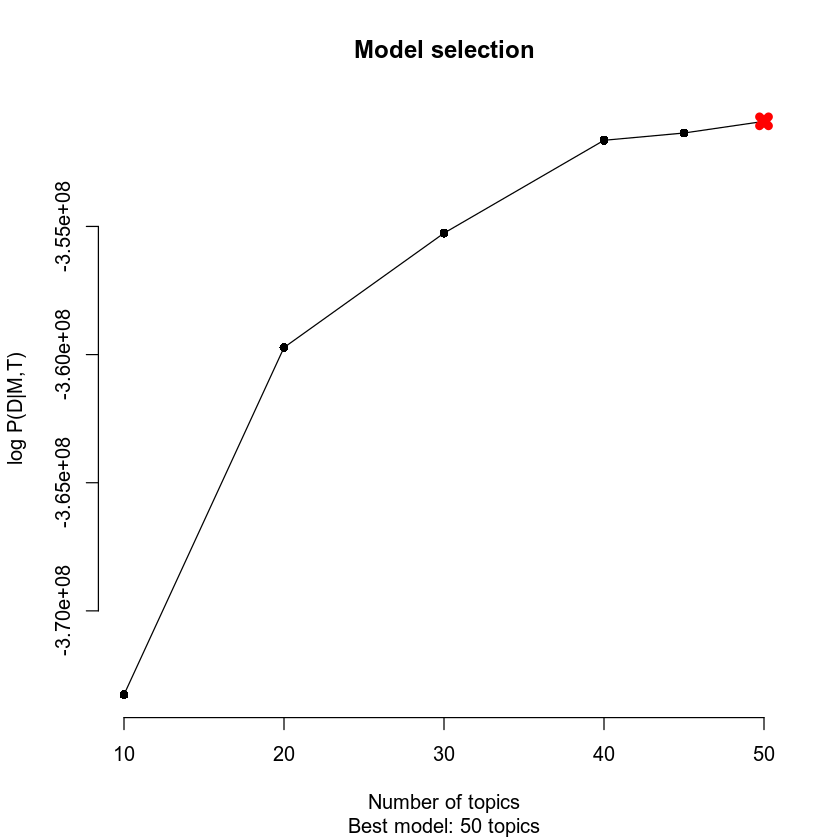

In [17]:
cisTopicObject <- selectModel(cisTopicObject)

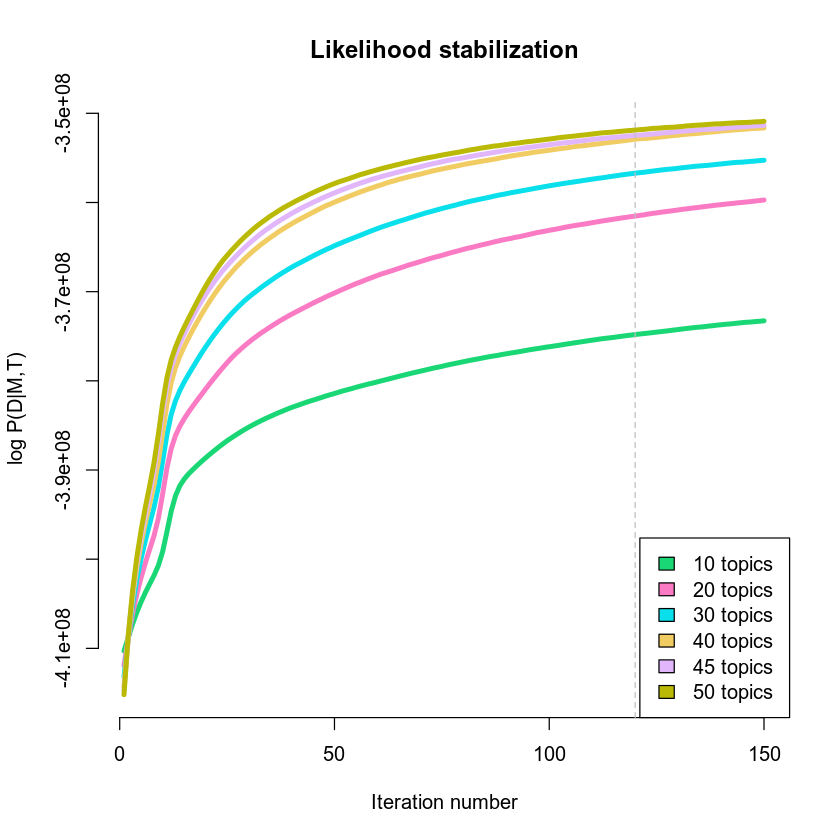

In [18]:
logLikelihoodByIter(cisTopicObject, select=c(10, 20, 30, 40, 45, 50))

In [19]:
end_time <- Sys.time()

In [20]:
end_time - start_time

Time difference of 1.672813 hours

In [21]:
cellassign <- modelMatSelection(cisTopicObject, 'cell', 'Probability')
dim(cellassign)
cellassign[1:5,1:5]

[1]   50 5335

,AAACGAAAGCGCAATG-1,AAACGAAAGGGTATCG-1,AAACGAAAGTAACATG-1,AAACGAAAGTTACACC-1,AAACGAACAGAGATGC-1
Topic1,0.0001023751,0.0001793239,0.0004855547,0.0001616684,0.0003309614
Topic2,0.0173013923,0.0173047611,0.0531682447,0.0522188990,0.0008274036
Topic3,0.0709459459,0.0475208464,0.0005664805,0.0002425026,0.0738044018
Topic4,0.0138206388,0.0552317762,0.0003237032,0.0004041710,0.0294555684
Topic5,0.0197583948,0.0272572402,0.0266245853,0.0317678442,0.0081085554


In [22]:
sum(colnames(cellassign) == rownames(metadata))

[1] 5335

In [23]:
# colnames(cellassign) = rownames(metadata)
# cellassign[1:5,1:5]

In [24]:
saveRDS(cellassign, file = '../../output/feature_matrices/FM_cisTopic_10xpbmc5k.rds')

### Downstream Analysis

In [31]:
metadata$label = as.factor(metadata$label)

In [32]:
cisTopicObject <- addCellMetadata(cisTopicObject, cell.data = metadata)

In [33]:
cisTopicObject <- runUmap(cisTopicObject, target='cell')

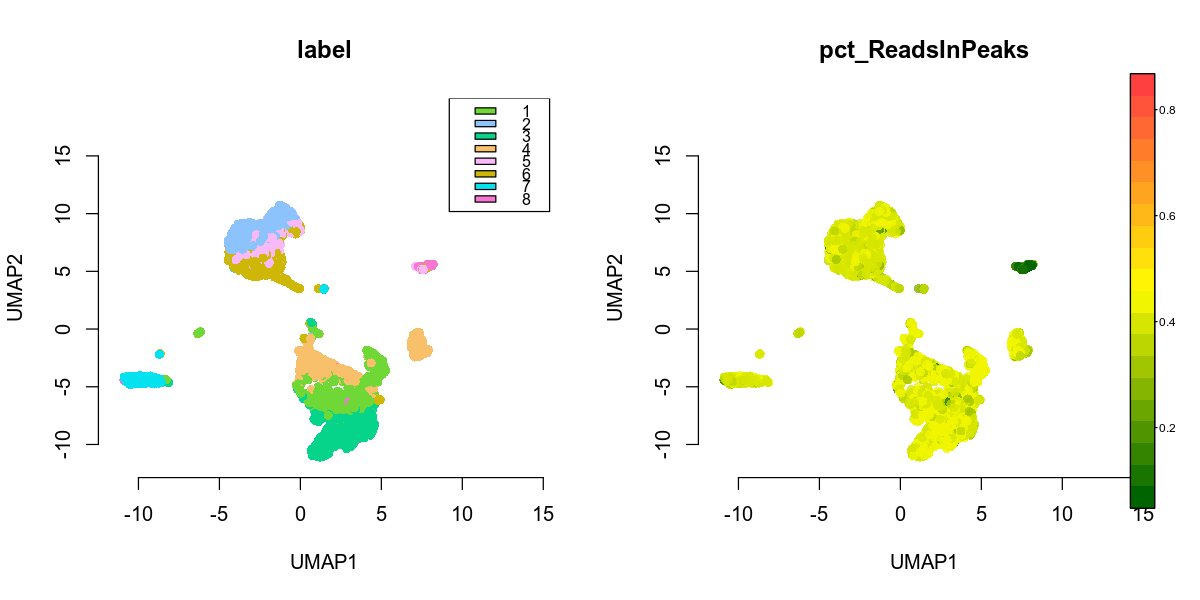

In [34]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plotFeatures(cisTopicObject, method='Umap', target='cell', topic_contr=NULL, colorBy=c('label','pct_ReadsInPeaks'), cex.legend = 0.8, factor.max=.75, dim=2, legend=TRUE, col.low='darkgreen', col.mid='yellow', col.high='brown1', intervals=20)

In [28]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_cisTopic/lib/R/lib/libRblas.so
LAPACK: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_cisTopic/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scatterplot3d_0.3-41 plotly_4.9.0         ggplot2_3.1.1       
[4] umap_0.2.0.0         Matrix_1.2-17        Rsubread_1.30.9     
[7] cisTopic_0.2.1       RevoUtils_11.0.1     RevoUtilsMath_11.0.0

loaded via a namespace (and not attached):
 [1] bitops_1.0-6                matrixStats_0.54.0         
 [3] bit64_0.9-7                 httr_1.4.0                 
 [5] GenomeInfoDb_1.16.0         repr_0.19.2                
 [7] tools_3.5.1                 R6_2.4.0                   
 [9] DBI_1.0.0                   BiocGenerics_

In [29]:
save.image(file = 'cisTopic_10xpbmc5k.RData')